In [104]:
import os
from pathlib import Path

iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')
if iskaggle: path = Path('../input/store-sales-time-series-forecasting')
else:
    path = Path('store-sales-time-series-forecasting')
    if not path.exists():
        import zipfile,kaggle
        kaggle.api.competition_download_cli(str(path))
        zipfile.ZipFile(f'{path}.zip').extractall(path)

In [105]:
import torch, numpy as np, pandas as pd
np.set_printoptions(linewidth=140)
torch.set_printoptions(linewidth=140, sci_mode=False, edgeitems=7)
pd.set_option('display.width', 140)

In [106]:
df = pd.read_csv(path/'train.csv')
df

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


In [107]:
df.isna().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

In [108]:
modes = df.mode().iloc[0]
modes

id                      0
date           2013-01-01
store_nbr             1.0
family         AUTOMOTIVE
sales                 0.0
onpromotion           0.0
Name: 0, dtype: object

In [109]:
df.fillna(modes, inplace=True)

In [110]:
df.isna().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

In [111]:
df.describe(include=(np.number))

,id,store_nbr,sales,onpromotion
count,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06
mean,1.500444e+06,2.750000e+01,3.577757e+02,2.602770e+00
std,8.662819e+05,1.558579e+01,1.101998e+03,1.221888e+01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,7.502218e+05,1.400000e+01,0.000000e+00,0.000000e+00
50%,1.500444e+06,2.750000e+01,1.100000e+01,0.000000e+00
75%,2.250665e+06,4.100000e+01,1.958473e+02,0.000000e+00
max,3.000887e+06,5.400000e+01,1.247170e+05,7.410000e+02


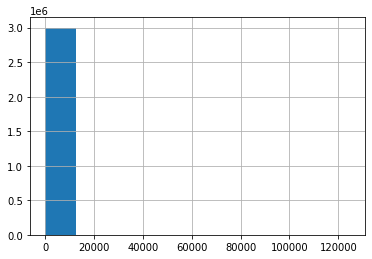

In [112]:
df['sales'].hist();

<AxesSubplot:>

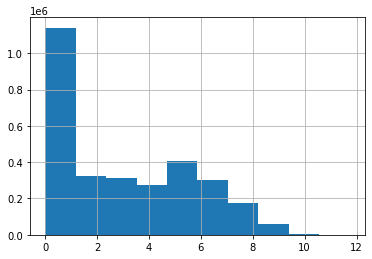

In [113]:
df['log sales'] = np.log(df['sales']+1)
df['log sales'].hist()

In [114]:
families = sorted(df.family.unique())
families

['AUTOMOTIVE',
 'BABY CARE',
 'BEAUTY',
 'BEVERAGES',
 'BOOKS',
 'BREAD/BAKERY',
 'CELEBRATION',
 'CLEANING',
 'DAIRY',
 'DELI',
 'EGGS',
 'FROZEN FOODS',
 'GROCERY I',
 'GROCERY II',
 'HARDWARE',
 'HOME AND KITCHEN I',
 'HOME AND KITCHEN II',
 'HOME APPLIANCES',
 'HOME CARE',
 'LADIESWEAR',
 'LAWN AND GARDEN',
 'LINGERIE',
 'LIQUOR,WINE,BEER',
 'MAGAZINES',
 'MEATS',
 'PERSONAL CARE',
 'PET SUPPLIES',
 'PLAYERS AND ELECTRONICS',
 'POULTRY',
 'PREPARED FOODS',
 'PRODUCE',
 'SCHOOL AND OFFICE SUPPLIES',
 'SEAFOOD']

In [115]:
isOnPromotion = sorted(df.store_nbr.unique())
isOnPromotion

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54]

In [116]:
df.describe(include=[object])

,date,family
count,3000888,3000888
unique,1684,33
top,2013-01-01,AUTOMOTIVE
freq,1782,90936


In [117]:
df = pd.get_dummies(df, columns=["family"])
df.columns

Index(['id', 'date', 'store_nbr', 'sales', 'onpromotion', 'log sales', 'family_AUTOMOTIVE', 'family_BABY CARE', 'family_BEAUTY',
       'family_BEVERAGES', 'family_BOOKS', 'family_BREAD/BAKERY', 'family_CELEBRATION', 'family_CLEANING', 'family_DAIRY', 'family_DELI',
       'family_EGGS', 'family_FROZEN FOODS', 'family_GROCERY I', 'family_GROCERY II', 'family_HARDWARE', 'family_HOME AND KITCHEN I',
       'family_HOME AND KITCHEN II', 'family_HOME APPLIANCES', 'family_HOME CARE', 'family_LADIESWEAR', 'family_LAWN AND GARDEN',
       'family_LINGERIE', 'family_LIQUOR,WINE,BEER', 'family_MAGAZINES', 'family_MEATS', 'family_PERSONAL CARE', 'family_PET SUPPLIES',
       'family_PLAYERS AND ELECTRONICS', 'family_POULTRY', 'family_PREPARED FOODS', 'family_PRODUCE', 'family_SCHOOL AND OFFICE SUPPLIES',
       'family_SEAFOOD'],
      dtype='object')

In [118]:
added_cols = ['family_AUTOMOTIVE', 'family_BABY CARE', 'family_BEAUTY',
       'family_BEVERAGES', 'family_BOOKS', 'family_BREAD/BAKERY', 'family_CELEBRATION', 'family_CLEANING', 'family_DAIRY', 'family_DELI',
       'family_EGGS', 'family_FROZEN FOODS', 'family_GROCERY I', 'family_GROCERY II', 'family_HARDWARE', 'family_HOME AND KITCHEN I',
       'family_HOME AND KITCHEN II', 'family_HOME APPLIANCES', 'family_HOME CARE', 'family_LADIESWEAR', 'family_LAWN AND GARDEN',
       'family_LINGERIE', 'family_LIQUOR,WINE,BEER', 'family_MAGAZINES', 'family_MEATS', 'family_PERSONAL CARE', 'family_PET SUPPLIES',
       'family_PLAYERS AND ELECTRONICS', 'family_POULTRY', 'family_PREPARED FOODS', 'family_PRODUCE', 'family_SCHOOL AND OFFICE SUPPLIES',
       'family_SEAFOOD']

In [119]:
from torch import tensor

t_dep = tensor(df.sales)

In [120]:
indep_cols = ['onpromotion'] + added_cols

t_indep = tensor(df[indep_cols].values, dtype=torch.float)
t_indep

tensor([[  0.,   1.,   0.,   0.,   0.,   0.,   0.,  ...,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   1.,   0.,   0.,   0.,   0.,  ...,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   1.,   0.,   0.,   0.,  ...,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   1.,   0.,   0.,  ...,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   1.,   0.,  ...,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   1.,  ...,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,  ...,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        ...,
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,  ...,   1.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,  ...,   0.,   1.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,  ...,   0.,   0.,   1.,   0.,   0., 

In [121]:
t_indep.shape

torch.Size([3000888, 34])

In [122]:
torch.manual_seed(442)

n_coeff = t_indep.shape[1]
coeffs = torch.rand(n_coeff)-0.5
coeffs

tensor([-0.4629,  0.1386,  0.2409, -0.2262, -0.2632, -0.3147,  0.4876,  0.3136,  0.2799, -0.4392,  0.2103,  0.3625,  0.1722,  0.2324,
        -0.3575, -0.0010, -0.1833, -0.2411,  0.0489,  0.0866, -0.0534,  0.3132, -0.1487, -0.2551,  0.3328,  0.1292,  0.2361, -0.2622,
         0.4051, -0.2674, -0.2312,  0.1147,  0.4072,  0.2834])

In [123]:
t_indep*coeffs

tensor([[ -0.0000,   0.1386,   0.0000,  -0.0000,  -0.0000,  -0.0000,   0.0000,  ...,  -0.0000,   0.0000,  -0.0000,  -0.0000,   0.0000,
           0.0000,   0.0000],
        [ -0.0000,   0.0000,   0.2409,  -0.0000,  -0.0000,  -0.0000,   0.0000,  ...,  -0.0000,   0.0000,  -0.0000,  -0.0000,   0.0000,
           0.0000,   0.0000],
        [ -0.0000,   0.0000,   0.0000,  -0.2262,  -0.0000,  -0.0000,   0.0000,  ...,  -0.0000,   0.0000,  -0.0000,  -0.0000,   0.0000,
           0.0000,   0.0000],
        [ -0.0000,   0.0000,   0.0000,  -0.0000,  -0.2632,  -0.0000,   0.0000,  ...,  -0.0000,   0.0000,  -0.0000,  -0.0000,   0.0000,
           0.0000,   0.0000],
        [ -0.0000,   0.0000,   0.0000,  -0.0000,  -0.0000,  -0.3147,   0.0000,  ...,  -0.0000,   0.0000,  -0.0000,  -0.0000,   0.0000,
           0.0000,   0.0000],
        [ -0.0000,   0.0000,   0.0000,  -0.0000,  -0.0000,  -0.0000,   0.4876,  ...,  -0.0000,   0.0000,  -0.0000,  -0.0000,   0.0000,
           0.0000,   0.0000],
        [ 

In [124]:
vals, indices = t_indep.max(dim=0)
t_indep = t_indep / vals

In [125]:
t_indep*coeffs

tensor([[-0.0000,  0.1386,  0.0000, -0.0000, -0.0000, -0.0000,  0.0000,  ..., -0.0000,  0.0000, -0.0000, -0.0000,  0.0000,  0.0000,
          0.0000],
        [-0.0000,  0.0000,  0.2409, -0.0000, -0.0000, -0.0000,  0.0000,  ..., -0.0000,  0.0000, -0.0000, -0.0000,  0.0000,  0.0000,
          0.0000],
        [-0.0000,  0.0000,  0.0000, -0.2262, -0.0000, -0.0000,  0.0000,  ..., -0.0000,  0.0000, -0.0000, -0.0000,  0.0000,  0.0000,
          0.0000],
        [-0.0000,  0.0000,  0.0000, -0.0000, -0.2632, -0.0000,  0.0000,  ..., -0.0000,  0.0000, -0.0000, -0.0000,  0.0000,  0.0000,
          0.0000],
        [-0.0000,  0.0000,  0.0000, -0.0000, -0.0000, -0.3147,  0.0000,  ..., -0.0000,  0.0000, -0.0000, -0.0000,  0.0000,  0.0000,
          0.0000],
        [-0.0000,  0.0000,  0.0000, -0.0000, -0.0000, -0.0000,  0.4876,  ..., -0.0000,  0.0000, -0.0000, -0.0000,  0.0000,  0.0000,
          0.0000],
        [-0.0000,  0.0000,  0.0000, -0.0000, -0.0000, -0.0000,  0.0000,  ..., -0.0000,  0.0000

In [126]:
preds = (t_indep*coeffs).sum(axis=1)

In [127]:
preds[:10]

tensor([ 0.1386,  0.2409, -0.2262, -0.2632, -0.3147,  0.4876,  0.3136,  0.2799, -0.4392,  0.2103])

In [128]:
loss = torch.abs(preds-t_dep).mean()
loss

tensor(357.8230, dtype=torch.float64)

In [129]:
def calc_preds(coeffs, indeps): return (indeps*coeffs).sum(axis=1)
def calc_loss(coeffs, indeps, deps): return torch.abs(calc_preds(coeffs, indeps)-deps).mean()

In [130]:
coeffs.requires_grad_()

tensor([-0.4629,  0.1386,  0.2409, -0.2262, -0.2632, -0.3147,  0.4876,  0.3136,  0.2799, -0.4392,  0.2103,  0.3625,  0.1722,  0.2324,
        -0.3575, -0.0010, -0.1833, -0.2411,  0.0489,  0.0866, -0.0534,  0.3132, -0.1487, -0.2551,  0.3328,  0.1292,  0.2361, -0.2622,
         0.4051, -0.2674, -0.2312,  0.1147,  0.4072,  0.2834], requires_grad=True)

In [131]:
loss = calc_loss(coeffs, t_indep, t_dep)
loss

tensor(357.8230, dtype=torch.float64, grad_fn=<MeanBackward0>)

In [132]:
loss.backward()

In [133]:
coeffs.grad

tensor([-0.0035, -0.0226,  0.0267, -0.0303, -0.0303, -0.0303, -0.0254, -0.0039, -0.0254, -0.0303, -0.0254, -0.0254, -0.0254, -0.0254,
        -0.0303, -0.0303, -0.0303, -0.0303,  0.0143, -0.0055, -0.0303, -0.0019, -0.0303, -0.0303,  0.0040, -0.0254, -0.0254, -0.0303,
        -0.0031, -0.0303, -0.0303, -0.0131,  0.0146, -0.0186])

In [134]:
loss = calc_loss(coeffs, t_indep, t_dep)
loss.backward()
coeffs.grad

tensor([-0.0070, -0.0451,  0.0535, -0.0606, -0.0606, -0.0606, -0.0508, -0.0077, -0.0508, -0.0606, -0.0508, -0.0508, -0.0508, -0.0508,
        -0.0606, -0.0606, -0.0606, -0.0606,  0.0285, -0.0110, -0.0606, -0.0039, -0.0606, -0.0606,  0.0079, -0.0508, -0.0508, -0.0606,
        -0.0062, -0.0606, -0.0606, -0.0262,  0.0292, -0.0371])

In [135]:
loss = calc_loss(coeffs, t_indep, t_dep)
loss.backward()
with torch.no_grad():
    coeffs.sub_(coeffs.grad * 0.1)
    coeffs.grad.zero_()
    print(calc_loss(coeffs, t_indep, t_dep))

tensor(357.8172, dtype=torch.float64)


In [136]:
from fastai.data.transforms import RandomSplitter
trn_split, val_split = RandomSplitter(seed=42)(df)

In [137]:
trn_indep, val_indep = t_indep[trn_split], t_indep[val_split]
trn_dep, val_dep = t_dep[trn_split], t_dep[val_split]
len(trn_indep), len(val_indep)

(2400711, 600177)

In [138]:
def update_coeffs(coeffs, lr):
    coeffs.sub_(coeffs.grad * lr)
    coeffs.grad.zero_()

In [139]:
def one_epoch(coeffs, lr):
    loss = calc_loss(coeffs, trn_indep, trn_dep)
    loss.backward()
    with torch.no_grad(): update_coeffs(coeffs, lr)
    print(f"{loss:.3f}", end=";-")

In [140]:
def init_coeffs(): return (torch.rand(n_coeff)-0.5).requires_grad_()

In [141]:
def train_model(epochs=30, lr=0.1):
    torch.manual_seed(442)
    coeffs = init_coeffs()
    for i in range(epochs): one_epoch(coeffs, lr=lr)
    return coeffs

In [142]:
coeffs = train_model(30, lr=0.2)

357.730;-357.726;-357.722;-357.718;-357.714;-357.710;-357.707;-357.703;-357.699;-357.695;-357.691;-357.688;-357.684;-357.680;-357.677;-357.673;-357.669;-357.666;-357.662;-357.658;-357.655;-357.651;-357.647;-357.644;-357.640;-357.636;-357.633;-357.629;-357.626;-357.622;-

In [143]:
def show_coeffs(): return dict(zip(indep_cols, coeffs.requires_grad_(False)))
show_coeffs()

{'onpromotion': tensor(-0.4418),
 'family_AUTOMOTIVE': tensor(0.2737),
 'family_BABY CARE': tensor(0.0806),
 'family_BEAUTY': tensor(-0.0441),
 'family_BEVERAGES': tensor(-0.0811),
 'family_BOOKS': tensor(-0.1332),
 'family_BREAD/BAKERY': tensor(0.6403),
 'family_CELEBRATION': tensor(0.3363),
 'family_CLEANING': tensor(0.4321),
 'family_DAIRY': tensor(-0.2572),
 'family_DELI': tensor(0.3624),
 'family_EGGS': tensor(0.5145),
 'family_FROZEN FOODS': tensor(0.3244),
 'family_GROCERY I': tensor(0.3849),
 'family_GROCERY II': tensor(-0.1762),
 'family_HARDWARE': tensor(0.0120),
 'family_HOME AND KITCHEN I': tensor(-0.0011),
 'family_HOME AND KITCHEN II': tensor(-0.0601),
 'family_HOME APPLIANCES': tensor(-0.0010),
 'family_HOME CARE': tensor(0.1198),
 'family_LADIESWEAR': tensor(0.0048),
 'family_LAWN AND GARDEN': tensor(0.3253),
 'family_LINGERIE': tensor(0.0235),
 'family_LIQUOR,WINE,BEER': tensor(-0.0732),
 'family_MAGAZINES': tensor(0.3093),
 'family_MEATS': tensor(0.2825),
 'family_PER

In [144]:
preds = calc_preds(coeffs, val_indep)

In [145]:
results = val_dep.bool()==(preds>0.5)
results[:16]

tensor([ True,  True, False,  True, False, False, False, False, False, False, False,  True,  True, False,  True, False])

In [146]:
results.float().mean()

tensor(0.3632)

In [147]:
def acc(coeffs): return (val_dep.bool()==(calc_preds(coeffs, val_indep)>0.5)).float().mean()
acc(coeffs)

tensor(0.3632)

In [148]:
preds[:28]

tensor([ 0.3363, -0.0011,  0.0120, -0.0732,  0.3883, -0.0441,  0.0048,  0.3093, -0.0489,  0.3244,  0.1937,  0.5145,  0.3948, -0.0732,
        -0.0798,  0.3191, -0.2572,  0.3807,  0.3624,  0.1198, -0.0601, -0.0798,  0.3191,  0.3363,  0.3226, -0.0862,  0.4238,  0.3624])

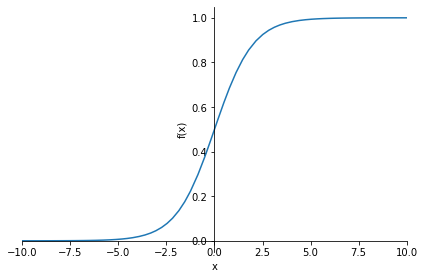

In [149]:
import sympy
sympy.plot("1/(1+exp(-x))", xlim=(-10,10));

In [150]:
def calc_preds(coeffs, indeps): return torch.sigmoid((indeps*coeffs).sum(axis=1))

In [151]:
coeffs = train_model(lr=100)

357.494;-357.421;-357.363;-357.324;-357.300;-357.284;-357.272;-357.264;-357.258;-357.253;-357.249;-357.245;-357.243;-357.240;-357.238;-357.236;-357.235;-357.234;-357.232;-357.231;-357.230;-357.229;-357.229;-357.228;-357.227;-357.226;-357.226;-357.225;-357.225;-357.224;-

In [152]:
acc(coeffs)

tensor(0.7835)

In [153]:
show_coeffs()

{'onpromotion': tensor(0.2039),
 'family_AUTOMOTIVE': tensor(4.1443),
 'family_BABY CARE': tensor(-4.3119),
 'family_BEAUTY': tensor(3.5989),
 'family_BEVERAGES': tensor(4.2573),
 'family_BOOKS': tensor(-4.4088),
 'family_BREAD/BAKERY': tensor(4.2973),
 'family_CELEBRATION': tensor(2.1557),
 'family_CLEANING': tensor(4.2830),
 'family_DAIRY': tensor(4.2449),
 'family_DELI': tensor(4.2781),
 'family_EGGS': tensor(4.2859),
 'family_FROZEN FOODS': tensor(4.2771),
 'family_GROCERY I': tensor(4.2812),
 'family_GROCERY II': tensor(4.1299),
 'family_HARDWARE': tensor(0.8393),
 'family_HOME AND KITCHEN I': tensor(3.0829),
 'family_HOME AND KITCHEN II': tensor(3.0586),
 'family_HOME APPLIANCES': tensor(-3.6114),
 'family_HOME CARE': tensor(2.5139),
 'family_LADIESWEAR': tensor(-2.6060),
 'family_LAWN AND GARDEN': tensor(1.5111),
 'family_LINGERIE': tensor(4.0281),
 'family_LIQUOR,WINE,BEER': tensor(3.9559),
 'family_MAGAZINES': tensor(-1.9293),
 'family_MEATS': tensor(4.2822),
 'family_PERSONAL

In [154]:
tst_df = pd.read_csv(path/'test.csv')

In [155]:
tst_df['onpromotion'] = tst_df.onpromotion.fillna(0)

In [156]:
tst_df.fillna(modes, inplace=True)
tst_df['log onpromotion'] = np.log(tst_df['onpromotion']+1)
tst_df = pd.get_dummies(tst_df, columns=["family"])

tst_indep = tensor(tst_df[indep_cols].values, dtype=torch.float)
tst_indep = tst_indep / vals

In [157]:
tst_df['sales'] = (calc_preds(tst_indep, coeffs)>0.5).int() 

In [ ]:
sub_df = tst_df["family", "onpromotion"]
sub_df.to_csv('sub.csv', index=False)

In [ ]:
!head sub.csv